<a href="https://colab.research.google.com/github/beangoben/TB_project/blob/master/relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/beangoben/rdkit_colab/master/colab_utils.py -O colab_utils.py
!rm -rf sample_data
import colab_utils

--2020-07-15 15:44:50--  https://raw.githubusercontent.com/beangoben/rdkit_colab/master/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7169 (7.0K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   7.00K  --.-KB/s    in 0s      

2020-07-15 15:44:51 (38.0 MB/s) - ‘colab_utils.py’ saved [7169/7169]



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
github_repo = 'https://github.com/beangoben/rdkit_colab'
# If working in a private colab repo, 
# save a id_rsa file in gdrive or dropbox, etc. and run copy_ssh_key
colab_utils.copy_ssh_key('https://www.dropbox.com/s/h6aw94l7sz763sz/id_rsa_colab?dl=1')
colab_utils.clone_repo(github_repo)
colab_utils.conda_install_from_yaml()
colab_utils.pip_install_from_yaml()

CMD: git clone --recursive https://github.com/beangoben/rdkit_colab
Conda installing ['rdkit', 'umap-learn']
 from channels ['rdkit', 'conda-forge']
CMD: wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
CMD: chmod +x Miniconda3-latest-Linux-x86_64.sh
CMD: bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done
## Package Plan ##
environment location: /usr/local
added / updated specs:
- _libgcc_mutex==0.1=main
- ca-certificates==2020.1.1=0
- certifi==2020.4.5.1=py37_0
- cffi==1.14.0=py37he30daa8_1
- chardet==3.0.4=py37_1003
- conda-package-handling==1.6.1=py37h7b6447c_0
- conda==4.8.3=py37_0
- cryptography==2.9.2=py37h1ba5d50_0
- idna==2.9=py_1
- ld_impl_linux-64==2.33.1=h53a641e_7
- libedit==3.1.20181209=hc058e9b_0
- libffi==3.3=he6710b0_1
- libgcc-ng==9.1.0=hdf63c60_0
- libstdcxx-ng==9.1.0=hdf63c60_0
- ncurses==6.2=he6710b0_1
- openssl==1.1.1g=h7b6447c_0
- pip==20.0.2=py37

In [5]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import scipy.stats as stats
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.cluster
import pandas as pd
import numpy as np
from IPython.display import display, HTML 
np.set_printoptions(threshold=sys.maxsize)

# utils
from tqdm.autonotebook import tqdm
from collections import OrderedDict
import itertools

# rdkit stuff
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

tqdm.pandas()
sns.set_context('talk', font_scale=1.5)
sns.set_style("white")
plt.rc('lines', linewidth=2)
plt.rc('figure', figsize=(10,5))
import altair as alt

#google drive stuff
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [13]:
all = pd.read_csv('/content/drive/My Drive/Extracurricular/Internships/Research/TB Internship/FullMerged.csv')

In [14]:
all = all.loc[all.concentration == 30]
all['mol'] = all.SMILES.apply(Chem.MolFromSmiles)
all['fingerprints'] = all.mol.apply(lambda x: AllChem.GetMorganFingerprint(x,2))
display(all.head())
display(all.info())
display(all.strain.unique())

,compound_stem,SMILES,compound_name,pubchem_cid,kegg_id,compound,concentration,strain,n_replicates,log_fold_change,std_error_lfc,log2_fold_change,std_error_l2fc,z_score,p_value,mol,fingerprints
1,A00113255,CC1(C)C[C@H](C2CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)...,"Oleanolic Acid, Caryophyllin, Astrantiagenin C...",49867939.0,NaN,BRD-A00113255-001-01-8,30.0,aceE,8.0,0.406739,0.095449,0.586800,0.137704,4.261321,2.053183e-05,<rdkit.Chem.rdchem.Mol object at 0x7f9cab542490>,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
5,A00113255,CC1(C)C[C@H](C2CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)...,"Oleanolic Acid, Caryophyllin, Astrantiagenin C...",49867939.0,NaN,BRD-A00113255-001-01-8,30.0,adoK,8.0,0.504762,0.077725,0.728218,0.112134,6.494179,8.796086e-11,<rdkit.Chem.rdchem.Mol object at 0x7f9cab542120>,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
9,A00113255,CC1(C)C[C@H](C2CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)...,"Oleanolic Acid, Caryophyllin, Astrantiagenin C...",49867939.0,NaN,BRD-A00113255-001-01-8,30.0,alaS,8.0,0.442811,0.113985,0.638841,0.164445,3.884817,1.031498e-04,<rdkit.Chem.rdchem.Mol object at 0x7f9cab5424e0>,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
13,A00113255,CC1(C)C[C@H](C2CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)...,"Oleanolic Acid, Caryophyllin, Astrantiagenin C...",49867939.0,NaN,BRD-A00113255-001-01-8,30.0,alr,8.0,0.268849,0.080620,0.387867,0.116310,3.334759,8.572283e-04,<rdkit.Chem.rdchem.Mol object at 0x7f9cab542170>,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
17,A00113255,CC1(C)C[C@H](C2CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)...,"Oleanolic Acid, Caryophyllin, Astrantiagenin C...",49867939.0,NaN,BRD-A00113255-001-01-8,30.0,argC,8.0,0.396642,0.114699,0.572233,0.165475,3.458115,5.465171e-04,<rdkit.Chem.rdchem.Mol object at 0x7f9cab542850>,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109344 entries, 1 to 447267
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   compound_stem     109344 non-null  object 
 1   SMILES            109344 non-null  object 
 2   compound_name     109242 non-null  object 
 3   pubchem_cid       102510 non-null  float64
 4   kegg_id           49878 non-null   object 
 5   compound          109344 non-null  object 
 6   concentration     109344 non-null  float64
 7   strain            109344 non-null  object 
 8   n_replicates      109344 non-null  float64
 9   log_fold_change   109344 non-null  float64
 10  std_error_lfc     109344 non-null  float64
 11  log2_fold_change  109344 non-null  float64
 12  std_error_l2fc    109344 non-null  float64
 13  z_score           109344 non-null  float64
 14  p_value           109344 non-null  float64
 15  mol               109344 non-null  object 
 16  fingerprints      10

None

array(['aceE', 'adoK', 'alaS', 'alr', 'argC', 'argG', 'aspS', 'atpDC',
       'canB', 'ccsX', 'clpP1P2', 'ctaC', 'dapF', 'def', 'desA1', 'desA2',
       'dfrA', 'dnaE1', 'dnaK', 'dnaN', 'efpA', 'eno', 'fadD32', 'fas',
       'fba', 'fmt', 'folB', 'ftsK', 'fum', 'gca', 'glcB', 'glgB', 'gltB',
       'gpm1', 'gpsI', 'gyrA', 'gyrB', 'H37Rv', 'hemA', 'hemB', 'hemC',
       'hisI', 'hsdM', 'icd2', 'ilvC', 'infB', 'ino1', 'intcon1',
       'intcon2', 'iscS', 'kasA', 'kasB', 'leuA', 'leuB', 'leuS', 'lipA',
       'lipU', 'manB', 'marP', 'mdh', 'menD', 'menE', 'menH', 'mesJ',
       'metS', 'moxR1', 'mprB', 'mshC', 'murA', 'murC', 'murD', 'murG',
       'mycP3', 'nadE', 'nrdH', 'otsA', 'pcnA', 'ppm1', 'prcBA', 'prfA',
       'proC', 'proS', 'rocA', 'rpoB', 'rpsM', 'Rv0282', 'Rv0283',
       'Rv0289', 'Rv0338c', 'Rv1339', 'Rv1797', 'Rv2017', 'Rv3267',
       'Rv3644c', 'Rv3719', 'secY', 'serC', 'topA', 'tpi', 'trpA', 'trpG',
       'trpS'], dtype=object)

In [15]:
def tani(f1, f2):
  return DataStructs.TanimotoSimilarity(f1,f2)

In [16]:
r_value_list = []
index = 0
for strain in all.strain.unique():
  print(str(index) + " " + strain)
  df = all.loc[all.strain == strain]
  fps = np.array(df.fingerprints.values.tolist())
  zscores = np.array(df.z_score.values.tolist())

  sim_lists = []
  for ref in fps:
    sim = []
    for fp in fps:
      sim.append(tani(ref, fp))
    sim_lists.append(sim)


  diff_lists = []
  for zref in zscores:
    diff = []
    for z in zscores:
      diff.append(np.linalg.norm(zref - z))
    diff_lists.append(diff)

  sim_lists = np.array(sim_lists)
  diff_lists = np.array(diff_lists)

  r_values = []
  for sim,diff in zip(sim_lists, diff_lists):
    slope, intercept, r_value, p_value, std_err = stats.linregress(sim,diff)
    r_values.append(r_value)
  r_value_list.append(np.array(r_values))
  index = index + 1

0 aceE
1 adoK
2 alaS
3 alr
4 argC
5 argG
6 aspS
7 atpDC
8 canB
9 ccsX
10 clpP1P2
11 ctaC
12 dapF
13 def
14 desA1
15 desA2
16 dfrA
17 dnaE1
18 dnaK
19 dnaN
20 efpA
21 eno
22 fadD32
23 fas
24 fba
25 fmt
26 folB
27 ftsK
28 fum
29 gca
30 glcB
31 glgB
32 gltB
33 gpm1
34 gpsI
35 gyrA
36 gyrB
37 H37Rv
38 hemA
39 hemB
40 hemC
41 hisI
42 hsdM
43 icd2
44 ilvC
45 infB
46 ino1
47 intcon1
48 intcon2
49 iscS
50 kasA
51 kasB
52 leuA
53 leuB
54 leuS
55 lipA
56 lipU
57 manB
58 marP
59 mdh
60 menD
61 menE
62 menH
63 mesJ
64 metS
65 moxR1
66 mprB
67 mshC
68 murA
69 murC
70 murD
71 murG
72 mycP3
73 nadE
74 nrdH
75 otsA
76 pcnA
77 ppm1
78 prcBA
79 prfA
80 proC
81 proS
82 rocA
83 rpoB
84 rpsM
85 Rv0282
86 Rv0283
87 Rv0289
88 Rv0338c
89 Rv1339
90 Rv1797
91 Rv2017
92 Rv3267
93 Rv3644c
94 Rv3719
95 secY
96 serC
97 topA
98 tpi
99 trpA
100 trpG
101 trpS


In [17]:
df = pd.DataFrame({'strain': all.strain.unique(), 'r_values': r_value_list}, columns=['strain', 'r_values'])
df['means'] = df.r_values.apply(lambda x: np.mean(x))

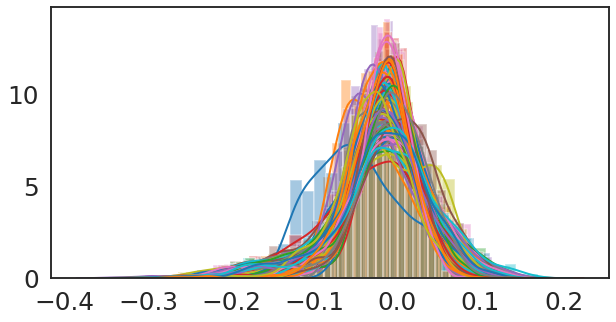

In [19]:
for li in df.r_values:
  display(sns.distplot(li))

In [41]:
bottomPercentile = df.describe(percentiles=[0.05, 0.95]).iloc[4].means

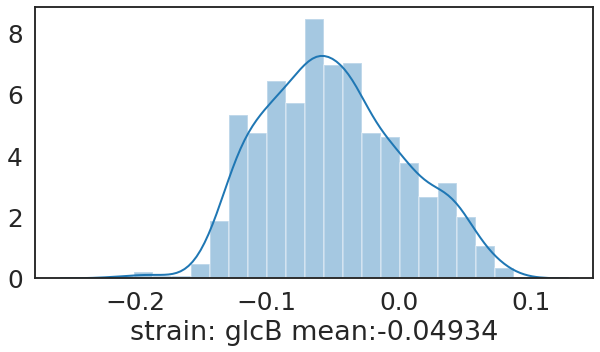

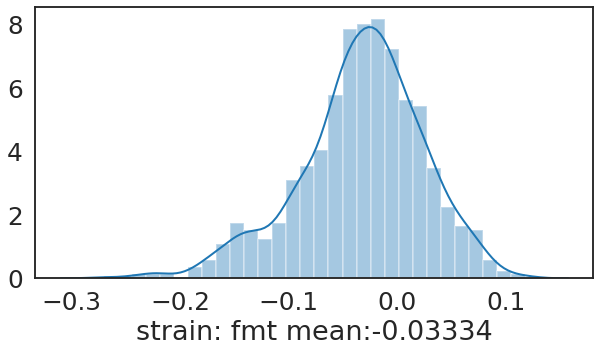

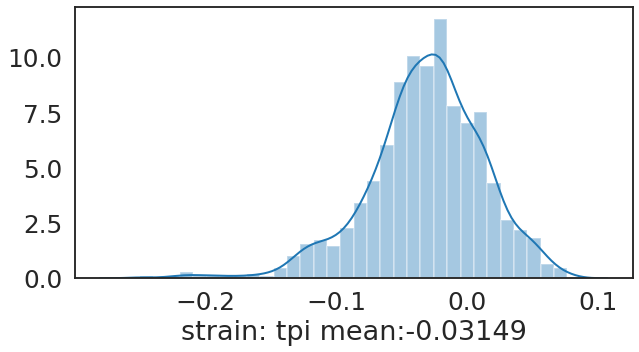

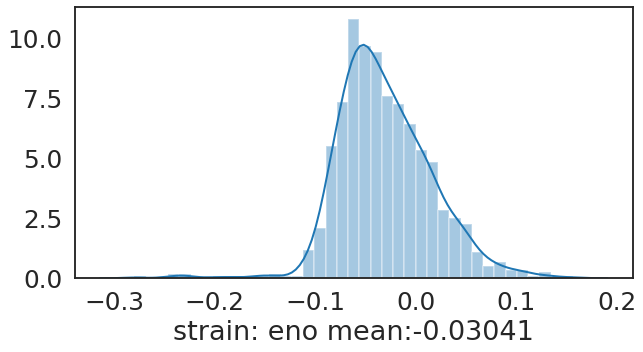

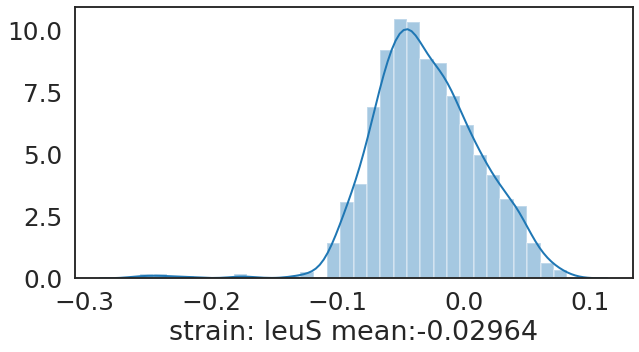

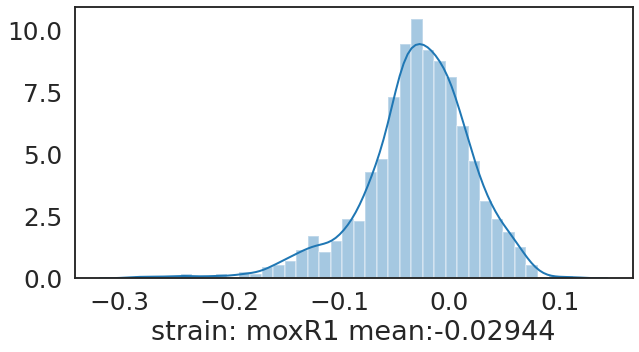

In [42]:
simp = df.loc[(df.means < bottomPercentile)]
simp = simp.sort_values('means')
for index, row in simp.iterrows():
  plt.figure() #this creates a new figure on which your plot will appear
  sns.distplot(row.r_values, axlabel=("strain: " + row.strain + " mean:" + str('%.5f'%(row.means))))